In [31]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import write, read
from scipy import signal


from numpy.fft import fft, ifft, fftfreq

In [32]:
sample_rate = 44100 # samples per second

A_max = 32767 # Max. amplitude




In [33]:
f_s = 44100   # Sampling rate: measurements per second


# Tarea

# Punto 1: Guitarra

(0, 0.0125)

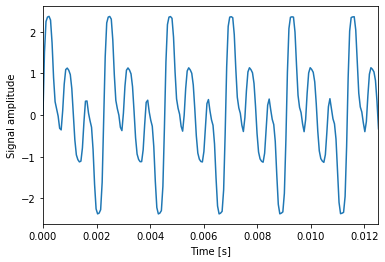

In [34]:
f0 = 440       
f_s = 44100  
f1 = 2 * f0        #harmonics
f2 = 3 * f0
f3 = 4 * f0
f4 = 5 * f0
f5 = 6 * f0
f6 = 7 * f0
f7 = 8 * f0
f8 = 9 * f0
f9 = 10 * f0

t = np.linspace(0, 5, 2*f_s, endpoint=False)
x  = np.sin(f0 * 2 * np.pi * t)


x += 0.65 * np.sin(f1 * 2 * np.pi * t)
x += 1.35 * np.sin(f2 * 2 * np.pi * t)
x += 0.15 * np.sin(f3 * 2 * np.pi * t)
x += 0.14 * np.sin(f4 * 2 * np.pi * t)
x += 0.11 * np.sin(f5 * 2 * np.pi * t)
x += 0.01 * np.sin(f6 * 2 * np.pi * t)
x += 0.02 * np.sin(f7 * 2 * np.pi * t)
x += 0.19 * np.sin(f8 * 2 * np.pi * t)
x += 0.05 * np.sin(f9 * 2 * np.pi * t)

scaled = np.int16( x  * A_max / np.max(np.abs(x))  )
write('guitar.wav', 44100, scaled)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

# Oboe

(0, 0.0125)

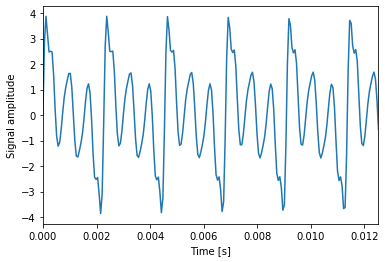

In [35]:
f0 = 440       
f_s = 44100  
f1 = 2 * f0        #harmonics
f2 = 3 * f0
f3 = 4 * f0
f4 = 5 * f0
f5 = 6 * f0
f6 = 7 * f0
f7 = 8 * f0
f8 = 9 * f0
f9 = 10 * f0


OboeFourierC = {'a_0':0,'a_1':1.0,'a_2':0.9,'a_3':2.1,'a_4':0.2,'a_5':0.22,'a_6':0.24,'a_7':0.56,'a_8':0.3,'a_9':0.22,'a_10':0.05}

t = np.linspace(0, 5, 2*f_s, endpoint=False)
y  = np.sin(f0 * 2 * np.pi * t)


y += OboeFourierC['a_2'] * np.sin(f1 * 2 * np.pi * t)
y += OboeFourierC['a_3'] * np.sin(f2 * 2 * np.pi * t)
y += OboeFourierC['a_4'] * np.sin(f3 * 2 * np.pi * t)
y += OboeFourierC['a_5'] * np.sin(f4 * 2 * np.pi * t)
y += OboeFourierC['a_6'] * np.sin(f5 * 2 * np.pi * t)
y += OboeFourierC['a_7'] * np.sin(f6 * 2 * np.pi * t)
y += OboeFourierC['a_8'] * np.sin(f7 * 2 * np.pi * t)
y += OboeFourierC['a_9'] * np.sin(f8 * 2 * np.pi * t)
y += OboeFourierC['a_10'] * np.sin(f9 * 2 * np.pi * t)

scaled = np.int16( y  * A_max / np.max(np.abs(y))  )
write('oboe.wav', 44100, scaled)

fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

# Punto 2: Diente de sierra

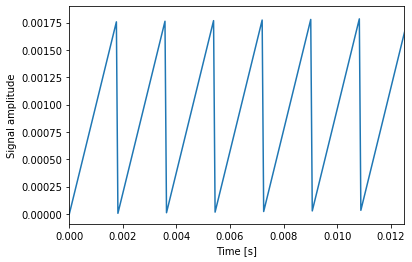

In [36]:
freq = 440       
sampfreq = 44100  

time = np.linspace(0, 5, 2*sampfreq, endpoint=False)
amplitude  = (time) % (5/(2*np.pi*freq))

fig, ax = plt.subplots()
ax.plot(time, amplitude)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

scaled = np.int16( amplitude  * A_max / np.max(np.abs(amplitude))  )
write('sawthoot.wav', 44100, scaled)


# Espectro de frecuencias

(0, 0.0005)

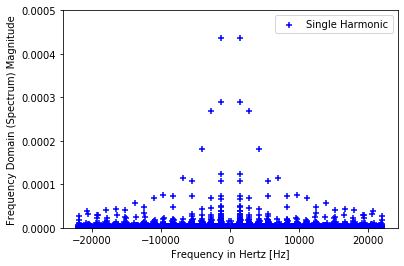

In [37]:
fX = fft(amplitude)*2/len(amplitude)
freqs = fftfreq(len(fX)) * f_s

fig, ax = plt.subplots()
ax.scatter(freqs, np.absolute(fX), 
           c="b", label="Single Harmonic", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-500, 500) 
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(-0,0.0005)


# Onda cuadrada

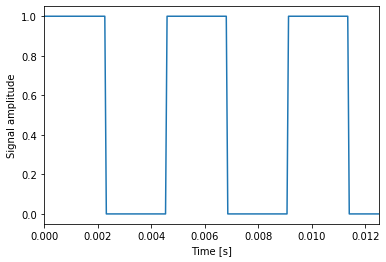

In [38]:
freq = 440       
sampfreq = 44100  

timesq = np.linspace(0, 5, 2*sampfreq, endpoint=False)
def ampsquare(x):
    data=[]
    for i in range(len(x)):
        if x[i]%(2*1/freq)<=1/freq:
            data.append(1)
        else:
            data.append(0)
    return np.asarray(data)
    
AMP  = ampsquare(timesq)

fig, ax = plt.subplots()
ax.plot(timesq, AMP)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

scaled = np.int16( AMP  * A_max / np.max(np.abs(AMP))  )
write('square.wav', 44100, scaled)


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

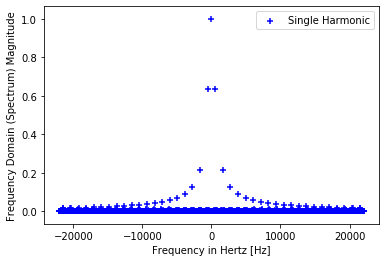

In [39]:
fY = fft(AMP)*2/len(AMP)
freqsq = fftfreq(len(fY)) * f_s

fig, ax = plt.subplots()
ax.scatter(freqsq, np.absolute(fY), 
           c="b", label="Single Harmonic", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-500, 500) 
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(-0,0.0005)

# Punto 3

In [40]:
#3 a

severla,muestreo= read('severla_000.wav')[1],read('severla_000.wav')[0]


#3 b

len(severla)/muestreo
#esto ocurre porque los datos del array están en unidades de muestreo y la variable muestreo está en unidades
#de muestreo/s


6.536125

32


(0, 100)

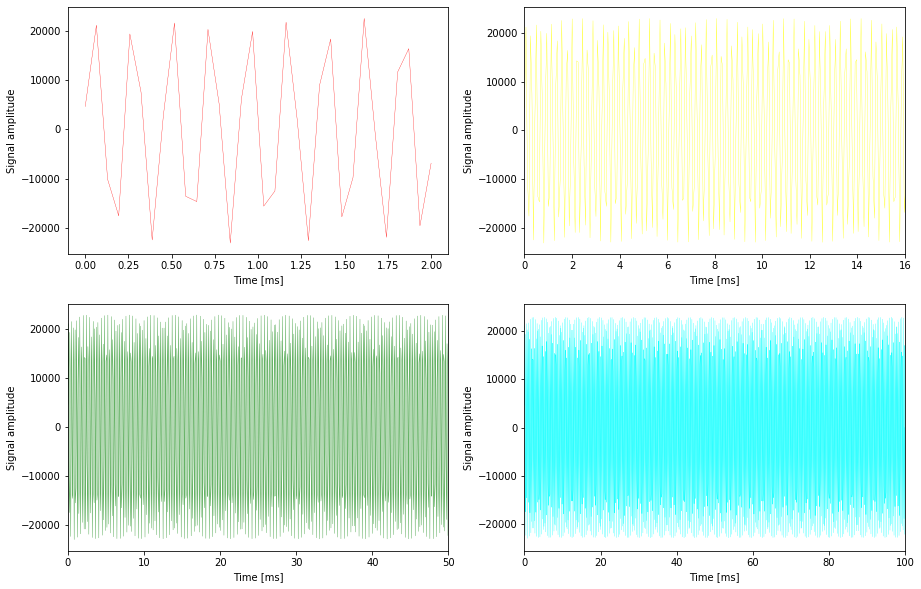

In [41]:
def dataovertime(x,t,var):
    realtime=len(x)/t
    datapermilisecond=int(len(x)/(realtime*1000))
    #print(realtime,datapermilisecond)
    return datapermilisecond*var

print(dataovertime(severla,muestreo,2))
#3 c

#Dado el razonamiento del b, los primeros 2 ms serán los primeros 32 elementos del array "severla"

t1 = np.linspace(0,2,dataovertime(severla,muestreo,2))
y1 = severla[:dataovertime(severla,muestreo,2)]


ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.linspace(0,2,dataovertime(severla,muestreo,2)),severla[:dataovertime(severla,muestreo,2)],c="r",linewidth=0.3)
plt.ylabel('Signal amplitude')
plt.xlabel('Time [ms]')

plt.subplot(2,2,2)
plt.plot(np.linspace(0,30,dataovertime(severla,muestreo,30)),severla[:dataovertime(severla,muestreo,30)],c="yellow",linewidth=0.3)
plt.ylabel('Signal amplitude')
plt.xlabel('Time [ms]')
plt.xlim(0,16)
plt.subplot(2,2,3)
plt.plot(np.linspace(0,500,dataovertime(severla,muestreo,500)),severla[:dataovertime(severla,muestreo,500)],c="green",linewidth=0.3)
plt.ylabel('Signal amplitude')
plt.xlabel('Time [ms]')
plt.xlim(0,50)
plt.subplot(2,2,4)
plt.plot(np.linspace(0,1000,dataovertime(severla,muestreo,1000)),severla[:dataovertime(severla,muestreo,1000)],c="cyan",linewidth=0.3)
plt.ylabel('Signal amplitude')
plt.xlabel('Time [ms]')
plt.xlim(0,100)
#plt.xlim(0,10)
#los límites muestran una densidad de datos aproximada a las respectivas cantidades de tiempo, se hace así para poder visualizarlos

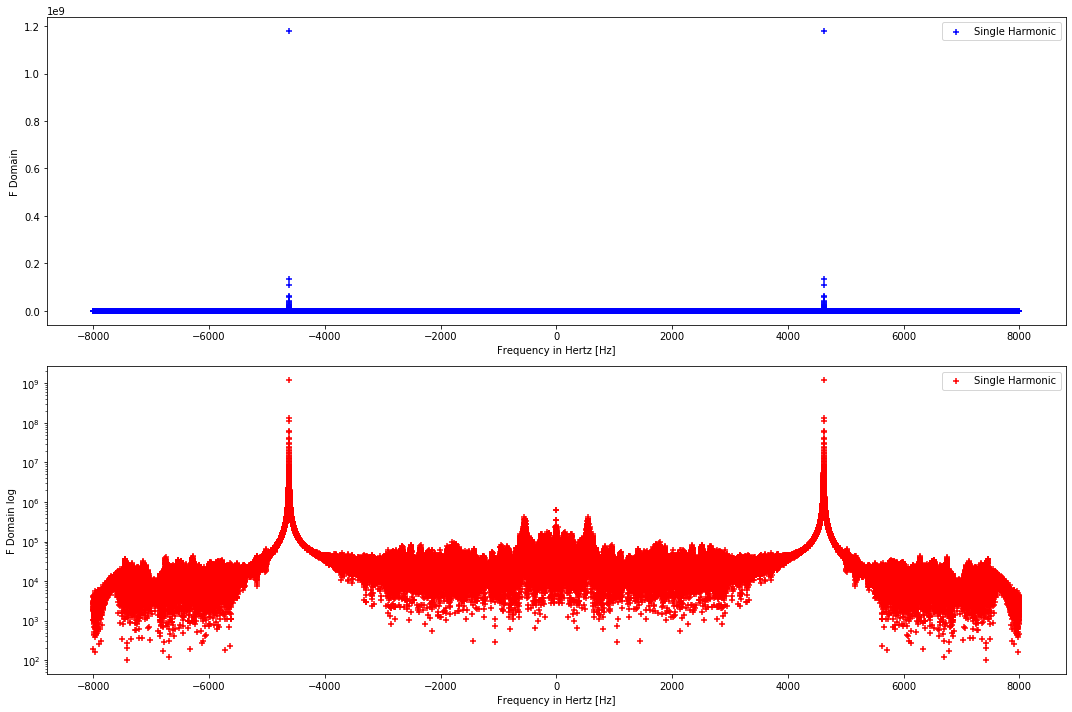

In [42]:
fseverla = fft(severla)*2/len(severla)
newfreqs = fftfreq(len(fft(severla))) * muestreo

fig, axs = plt.subplots(2,figsize=(15,10))

axs[0].scatter(newfreqs, np.absolute(fft(severla)), 
           c="b", label="Single Harmonic", marker="+")
axs[0].legend(loc=0)

axs[0].set_xlabel('Frequency in Hertz [Hz]')
axs[0].set_ylabel('F Domain')
#ax.set_xlim(-500, 500) 
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(-0,0.0005)

axs[1].scatter(newfreqs, np.absolute(fft(severla)), 
           c="r", label="Single Harmonic", marker="+")
axs[1].legend(loc=0)

axs[1].set_xlabel('Frequency in Hertz [Hz]')
axs[1].set_ylabel('F Domain log')
#ax.set_xlim(-500, 500) 
axs[1].set_yscale('log')
fig.tight_layout()
#ax.set_xscale('log')
#ax.set_ylim(-0,0.0005)


104578
104578


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

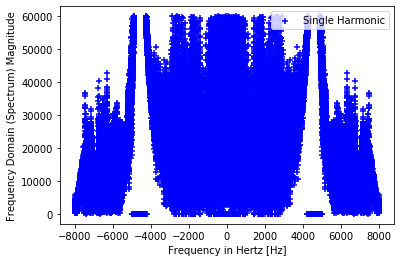

In [43]:
print(len(severla))
print(len(fft(severla)))

def filtro(freqss,cut):
    filtered=[]
    for j in freqss:
        if np.abs(j)>=cut:
            filtered.append(0)
        if np.abs(j)<cut:
            filtered.append(j)
    return np.asarray(filtered)

filtrada=filtro(fft(severla),60000)


filtseverla = filtrada
newfreqsf = fftfreq(len(filtseverla)) * muestreo

fig, ax = plt.subplots()
ax.scatter(newfreqsf, np.absolute(filtseverla), 
           c="b", label="Single Harmonic", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-500, 500) 
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(-0,0.0005)

#Tiene sentido, no debería haber una frecuencia dominante después del filtro

In [44]:
audio=ifft(filtrada)
print(audio)
Volume=32767
scaled = np.int16( audio*Volume/ np.max(np.abs(audio))  )
write('3_senal_limpia.wav', muestreo, scaled)

[ 9560.31010423+5.45241108e-12j    27.35037978+5.44350555e-13j
 -5422.81859763-1.88868041e-12j ... -4247.90382774+7.09493819e-12j
  3435.38040178-6.32842301e-12j  5973.77871411+8.12514535e-12j]


C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [45]:
audioinv=audio[::-1]
print(audioinv)
Volume=32767
scaled = np.int16( audioinv*Volume/ np.max(np.abs(audioinv)))
write('3_mensaje_decodificado.wav', muestreo, scaled)

[ 5973.77871411+8.12514535e-12j  3435.38040178-6.32842301e-12j
 -4247.90382774+7.09493819e-12j ... -5422.81859763-1.88868041e-12j
    27.35037978+5.44350555e-13j  9560.31010423+5.45241108e-12j]


C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
